# Stock Price Prediction Using Numerical And Textual Analysis. 

In this notebook, we will use stock price data of **SENSEX** from 2001 till the end of 2020 and news headlines from **"Times of India"** to build a model to predict stock prices. The additional news headlines will be used for sentiment analysis and then merged with the stock price dataset. 

### Game Plan : 

Primary these are our plan of action : 

1. Get Data 
2. Explore Data
3. Investigate and Preprocess 
4. EDA and visualization 
5. Sentiment analysis 
6. Merge Data
7. Scale Data 
8. Split Data
9. Modeling
10. Prediction

First, lets get the stock price data. 

## Stock Price Data

In [ ]:
! pip install yfinance

     |████████████████████████████████| 6.3MB 7.3MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23455 sha256=c8c8bb16e623a20266d10262f3ddcb5bfbb614950699962f76559db34bbf5b7b
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf

import requests

bse = yf.Ticker("^BSESN")


# get historical market data
stock_ds = bse.history(start = "2001-01-01", end = "2020-12-31")
stock_ds = stock_ds.to_csv("stock_data.csv")


In [ ]:
import pandas as pd 
import numpy as np

stock_ds = pd.read_csv("stock_data.csv", parse_dates=['Date'], index_col=['Date'])
stock_ds.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0,0,0
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,0,0
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,0,0
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,0,0
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,0,0


In [ ]:
stock_ds.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-12-23,46072.300781,46513.320312,45899.101562,46444.179688,10500,0,0
2020-12-24,46743.488281,47053.398438,46539.019531,46973.539062,13700,0,0
2020-12-28,47153.589844,47406.718750,47148.238281,47353.750000,9600,0,0
2020-12-29,47466.621094,47714.550781,47361.898438,47613.078125,12800,0,0
2020-12-30,47789.031250,47807.851562,47358.359375,47746.218750,15600,0,0


## News Headlines Data 





In [ ]:
news = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/india-news-headlines.csv", parse_dates=['publish_date'], index_col=['publish_date'])
news.head()

,headline_category,headline_text
publish_date,,
2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2001-01-02,unknown,America's unwanted heading for India?
2001-01-02,unknown,For bigwigs; it is destination Goa
2001-01-02,unknown,Extra buses to clear tourist traffic


In [ ]:
news.tail()

,headline_category,headline_text
publish_date,,
2020-12-31,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
2020-12-31,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
2020-12-31,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...
2020-12-31,removed,Govt extends deadline for use of FASTag till F...
2020-12-31,entertainment.bengali.movies.news,Celebs plan to party safely and responsibly on...


There are more than one headline in each of the date. What we can do is after performing sentiment analysis for each of the rows, we can take the average sentiment value for a date. But we will go to that later. First lets deal with stock price data.



## EDA of Stock Price Data

In [ ]:
stock_ds.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,4921.000000,4921.000000,4921.000000,4921.000000,4.921000e+03,4921.0,4921.0
mean,18612.094024,18724.316474,18463.717506,18591.837664,8.024708e+04,0.0,0.0
std,11269.405124,11308.947551,11199.932276,11252.256676,1.066935e+06,0.0,0.0
min,2621.889893,2682.590088,2594.870117,2600.120117,0.000000e+00,0.0,0.0
25%,8707.349609,8821.839844,8631.599609,8739.240234,9.400000e+03,0.0,0.0
50%,17603.289062,17714.880859,17463.779297,17591.179688,1.390000e+04,0.0,0.0
75%,27261.759766,27392.179688,27131.439453,27252.529297,2.080000e+04,0.0,0.0
max,47789.031250,47807.851562,47361.898438,47746.218750,3.181510e+07,0.0,0.0


Dropping null values, duplicate values

In [ ]:
stock_ds.drop_duplicates()

stock_ds = stock_ds.loc[:, (stock_ds != 0).any(axis=0)]

In [ ]:
stock_ds.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4921 entries, 2001-01-02 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    4921 non-null   float64
 1   High    4921 non-null   float64
 2   Low     4921 non-null   float64
 3   Close   4921 non-null   float64
 4   Volume  4921 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 230.7 KB




Trying to detect outliers

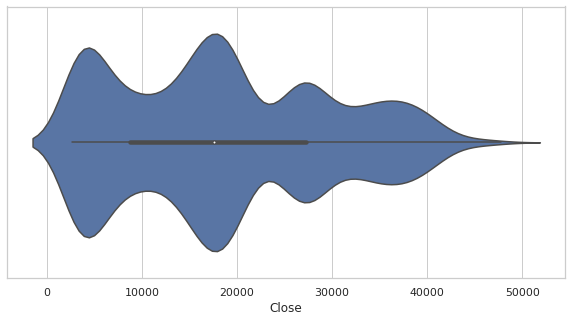

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
ax = sns.violinplot(x='Close', data=stock_ds, orient="h")

### Visualizing The Stock Data 

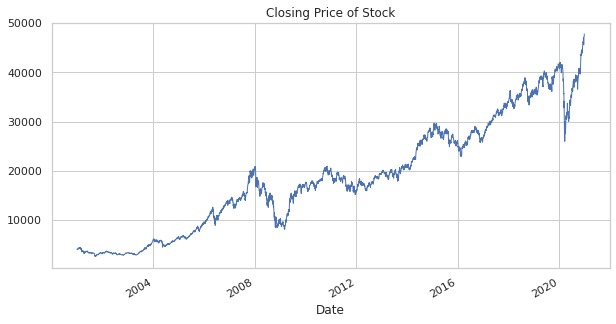

In [ ]:
stock_ds.plot(y="Close", title="Closing Price of Stock", grid=True, legend=False, linewidth=1, figsize=(10,5))
plt.show()


### Percentage Change 
We can determine the daily changes in percentages. This means how much the price deviated from the previous day's price.

In [ ]:
stock_ds["Day_Perc_Change"] = stock_ds["Close"].pct_change().fillna(value=0)*100
stock_ds.head()

,Open,High,Low,Close,Volume,Day_Perc_Change
Date,,,,,,
2001-01-02,3953.219971,4028.570068,3929.370117,4018.879883,0,0.000000
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,1.023672
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,1.363296
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,1.661087
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,-1.512999


In [ ]:
stock_ds.index

DatetimeIndex(['2001-01-02', '2001-01-03', '2001-01-04', '2001-01-05',
               '2001-01-08', '2001-01-09', '2001-01-10', '2001-01-11',
               '2001-01-12', '2001-01-15',
               ...
               '2020-12-16', '2020-12-17', '2020-12-18', '2020-12-21',
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-28',
               '2020-12-29', '2020-12-30'],
              dtype='datetime64[ns]', name='Date', length=4921, freq=None)

### Daily volume and daily percentage changes 

We will observe a comparison between daily volume of the stocks and how much the prices deviated every day.

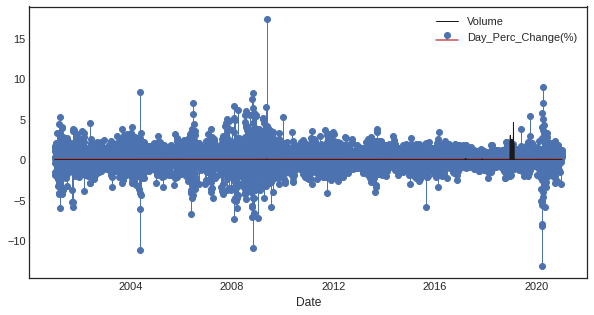

In [ ]:
with plt.style.context(plt.style.available[23]):
    plt.figure(figsize=(10,5))
    markerline, stemlines, baseline = plt.stem(stock_ds.index, stock_ds.Day_Perc_Change,label="Day_Perc_Change(%)", use_line_collection=True)
    plt.setp(stemlines, 'linewidth', 1)
    plt.plot(stock_ds.index, stock_ds["Volume"].values/7000000, color='k', linewidth=1, label="Volume")
    plt.xlabel("Date")
    plt.legend()
    plt.show()

When there is good news about Company, People tend to buy the stock and stock price start to increase. Which means, at end of day Volume is large. It means Positive change happen in stock than previous day.

### Rolling Average 

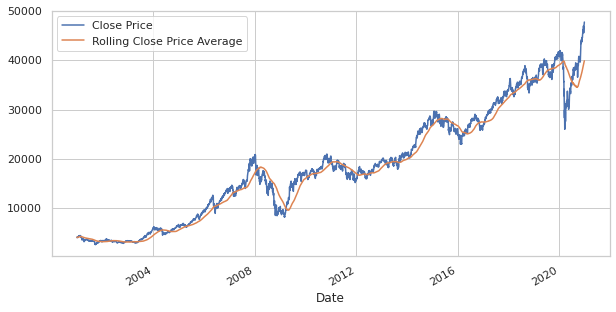

In [ ]:
rolling = stock_ds.Close.rolling('200D').mean()
plt.figure(figsize=(10,5))

stock_ds.Close.plot()
rolling.plot()
plt.legend(['Close Price','Rolling Close Price Average'])

### Moving Average 



In [ ]:
from sklearn.metrics import mean_absolute_error
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 

    """
    rolling_mean = series.rolling(window=window).mean()

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(window))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
        plt.plot(lower_bond, "r--")
        
        # Having the intervals, find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10)
        
    plt.plot(series[window:], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)

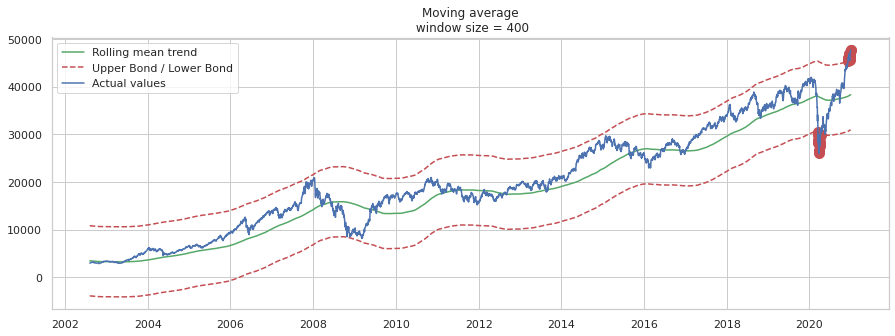

In [ ]:
plotMovingAverage(stock_ds[['Close']], 400, plot_intervals=True, scale=1.96, plot_anomalies=True)

The moving average window clashes with the actual data at the end of the plot because of the drastic drop and jump. 

### Stationarity

In [ ]:
from statsmodels.tsa.stattools import adfuller
def check_stationarity(series): 

  result = adfuller(series, autolag='AIC')
  print(f'ADF Statistic: {result[0]}')
  print(f'n_lags: {result[1]}')
  print(f'p-value: {result[1]}')
  for key, value in result[4].items():

    print('Critial Values:')
    print(f'   {key}, {value}')

  print("======================================")
  
  if result[0] > 0.05:
    print("The data is non stationary")
  else :
    print("The data is stationary") 

check_stationarity(stock_ds['Close'])

  

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ADF Statistic: 0.48370758549272885
n_lags: 0.9843693980452888
p-value: 0.9843693980452888
Critial Values:
   1%, -3.4316874355346676
Critial Values:
   5%, -2.8621309990122206
Critial Values:
   10%, -2.567084589984215
The data is non stationary


**The ADF statistic is more than 0.05.** Since the data is non stationary, we have to make it stationary before running a model.

In [ ]:
stock_ds['Close_stationary'] = stock_ds['Close'].diff().dropna()
stock_ds = stock_ds[stock_ds['Close_stationary'].notna()]
stock_ds.head()

,Open,High,Low,Close,Volume,Day_Perc_Change,Close_stationary
Date,,,,,,,
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,1.023672,41.140137
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,1.363296,55.350098
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,1.661087,68.359863
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,-1.512999,-63.299805
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,0,0.118431,4.879883


In [ ]:
# Checking Stationarity again 
check_stationarity(stock_ds['Close_stationary'])

ADF Statistic: -12.647537714730326
n_lags: 1.3911429334364883e-23
p-value: 1.3911429334364883e-23
Critial Values:
   1%, -3.4316874355346676
Critial Values:
   5%, -2.8621309990122206
Critial Values:
   10%, -2.567084589984215
The data is stationary


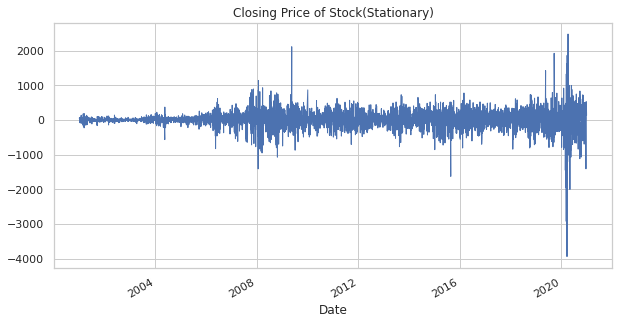

In [ ]:
stock_ds.plot(y="Close_stationary", title="Closing Price of Stock(Stationary)", grid=True, legend=False, linewidth=1, figsize=(10,5))
plt.show()


## Sentiment Analysis of News Headlines 

In [ ]:
news.index.name = 'Date'

news.head()


,headline_category,headline_text
Date,,
2001-01-02,unknown,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,unknown,Fissures in Hurriyat over Pak visit
2001-01-02,unknown,America's unwanted heading for India?
2001-01-02,unknown,For bigwigs; it is destination Goa
2001-01-02,unknown,Extra buses to clear tourist traffic


In [ ]:
news.drop('headline_category', 'columns', inplace = True)
news.head()

,headline_text
Date,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...
2001-01-02,Fissures in Hurriyat over Pak visit
2001-01-02,America's unwanted heading for India?
2001-01-02,For bigwigs; it is destination Goa
2001-01-02,Extra buses to clear tourist traffic


In [ ]:
news.index 

DatetimeIndex(['2001-01-02', '2001-01-02', '2001-01-02', '2001-01-02',
               '2001-01-02', '2001-01-02', '2001-01-02', '2001-01-02',
               '2001-01-02', '2001-01-02',
               ...
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31', '2020-12-31', '2020-12-31',
               '2020-12-31', '2020-12-31'],
              dtype='datetime64[ns]', name='Date', length=3424067, freq=None)

In [ ]:
news['Polarity'] = ""
news['Subjectivity'] = ""
news.head()

,headline_text,Polarity,Subjectivity
Date,,,
2001-01-02,Status quo will not be disturbed at Ayodhya; s...,,
2001-01-02,Fissures in Hurriyat over Pak visit,,
2001-01-02,America's unwanted heading for India?,,
2001-01-02,For bigwigs; it is destination Goa,,
2001-01-02,Extra buses to clear tourist traffic,,


Since the news dataset is HUGE ! and colab ram crashes after a while to apply the sentiment function on the whole dataset, we will chuck the data by year and apply that function in each chunk. Later we will merge the whole dataset again, find the mean sentiment scores for each date and move on.

In [ ]:
# chinking the huge news data by year
news_2001 = news.loc['2001']
news_2002 = news.loc['2002']
news_2003 = news.loc['2003']
news_2004 = news.loc['2004']
news_2005 = news.loc['2005']
news_2006 = news.loc['2006']
news_2007 = news.loc['2007']
news_2008 = news.loc['2008']
news_2009 = news.loc['2009']
news_2010 = news.loc['2010']
news_2011 = news.loc['2011']
news_2012 = news.loc['2012']
news_2013 = news.loc['2013']
news_2014 = news.loc['2014']
news_2015 = news.loc['2015']
news_2016 = news.loc['2016']
news_2017 = news.loc['2017']
news_2018 = news.loc['2018']
news_2019 = news.loc['2019']
news_2020 = news.loc['2020']


In [ ]:
from textblob import TextBlob

def sentiment(text):
    try:
        return TextBlob(text).sentiment
    except:
        return None






In [ ]:
news_2001['Polarity'] = news_2001['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2002['Polarity'] = news_2002['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2003['Polarity'] = news_2003['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2004['Polarity'] = news_2004['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2005['Polarity'] = news_2005['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2006['Polarity'] = news_2006['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2007['Polarity'] = news_2007['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2008['Polarity'] = news_2008['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2009['Polarity'] = news_2009['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2010['Polarity'] = news_2010['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2011['Polarity'] = news_2011['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2012['Polarity'] = news_2012['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2013['Polarity'] = news_2013['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2014['Polarity'] = news_2014['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2015['Polarity'] = news_2015['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2016['Polarity'] = news_2016['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2017['Polarity'] = news_2017['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2018['Polarity'] = news_2018['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2019['Polarity'] = news_2019['headline_text'].apply(sentiment).apply(lambda x: x[0])
news_2020['Polarity'] = news_2020['headline_text'].apply(sentiment).apply(lambda x: x[0])

news_2001['Subjectivity'] = news_2001['headline_text'].apply(sentiment).apply(lambda x : x[1])
news_2002['Subjectivity'] = news_2002['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2003['Subjectivity'] = news_2003['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2004['Subjectivity'] = news_2004['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2005['Subjectivity'] = news_2005['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2006['Subjectivity'] = news_2006['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2007['Subjectivity'] = news_2007['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2008['Subjectivity'] = news_2008['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2009['Subjectivity'] = news_2009['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2010['Subjectivity'] = news_2010['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2011['Subjectivity'] = news_2011['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2012['Subjectivity'] = news_2012['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2013['Subjectivity'] = news_2013['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2014['Subjectivity'] = news_2014['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2015['Subjectivity'] = news_2015['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2016['Subjectivity'] = news_2016['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2017['Subjectivity'] = news_2017['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2018['Subjectivity'] = news_2018['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2019['Subjectivity'] = news_2019['headline_text'].apply(sentiment).apply(lambda x: x[1])
news_2020['Subjectivity'] = news_2020['headline_text'].apply(sentiment).apply(lambda x: x[1])

In [ ]:
news_2020.tail()

,headline_text,Polarity,Subjectivity
Date,,,
2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000
2020-12-31,Celebs plan to party safely and responsibly on...,0.318182,0.477273


There are some duplicate entries. We will filter them out after merging.

In [ ]:
news_merged = pd.concat([news_2001, news_2002, news_2003, news_2004, news_2005, news_2006, news_2007,
                         news_2008, news_2009, news_2010, news_2011, news_2012, news_2013, news_2014,
                         news_2015, news_2016, news_2017, news_2018, news_2019, news_2020])

In [ ]:
news_merged.tail()

,headline_text,Polarity,Subjectivity
Date,,,
2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000
2020-12-31,Celebs plan to party safely and responsibly on...,0.318182,0.477273


In [ ]:
news_merged['headline_text'] = news_merged['headline_text'].astype(str)

In [ ]:
news_merged = news_merged.drop_duplicates( subset= ['headline_text'], keep="last", inplace=False)
news_merged.tail()

,headline_text,Polarity,Subjectivity
Date,,,
2020-12-31,Get govt nod to probe officials: MP to agencies,0.000000,0.000000
2020-12-31,Peddler nabbed; 10kg ganja seized in Anantapur...,0.000000,0.000000
2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...,0.500000,0.500000
2020-12-31,Govt extends deadline for use of FASTag till F...,0.000000,0.000000
2020-12-31,Celebs plan to party safely and responsibly on...,0.318182,0.477273


In [ ]:
news_merged = news_merged.drop(columns= "headline_text")


In [ ]:
news_merged.head()

,Polarity,Subjectivity
Date,,
2001-01-02,0.00,0.000000
2001-01-02,0.00,0.000000
2001-01-02,0.00,0.000000
2001-01-02,0.05,0.241667
2001-01-02,0.00,0.000000


In [ ]:
news_merged = news_merged.groupby(['Date']).mean()

## Merging Stock Price and News Sentiment Dataset 


In [ ]:
stock_ds.head()

,Open,High,Low,Close,Volume,Day_Perc_Change,Close_stationary
Date,,,,,,,
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,1.023672,41.140137
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,1.363296,55.350098
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,1.661087,68.359863
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,-1.512999,-63.299805
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,0,0.118431,4.879883


In [ ]:
news_merged.head()

,Polarity,Subjectivity
Date,,
2001-01-02,0.060234,0.083041
2001-01-03,0.011280,0.061890
2001-01-04,0.028047,0.144565
2001-01-05,0.140521,0.231354
2001-01-06,0.107851,0.264050


In [ ]:
df =pd.merge(stock_ds , news_merged , how='inner', left_index=True, right_index=True)


In [ ]:
df.head()

,Open,High,Low,Close,Volume,Day_Perc_Change,Close_stationary,Polarity,Subjectivity
Date,,,,,,,,,
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,1.023672,41.140137,0.011280,0.061890
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,1.363296,55.350098,0.028047,0.144565
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,1.661087,68.359863,0.140521,0.231354
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,-1.512999,-63.299805,0.013088,0.108064
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,0,0.118431,4.879883,0.012452,0.169859


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4890 entries, 2001-01-03 to 2020-12-30
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Open              4890 non-null   float64
 1   High              4890 non-null   float64
 2   Low               4890 non-null   float64
 3   Close             4890 non-null   float64
 4   Volume            4890 non-null   int64  
 5   Day_Perc_Change   4890 non-null   float64
 6   Close_stationary  4890 non-null   float64
 7   Polarity          4890 non-null   float64
 8   Subjectivity      4890 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 382.0 KB


In [ ]:
df.to_csv('stock_news.csv')

## Preprocessing 

In [53]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_news.csv', parse_dates=['Date'], index_col=['Date'])
df.head()

,Open,High,Low,Close,Volume,Day_Perc_Change,Close_stationary,Polarity,Subjectivity
Date,,,,,,,,,
2001-01-03,3977.580078,4067.659912,3977.580078,4060.020020,0,1.023672,41.140137,0.011280,0.061890
2001-01-04,4180.970215,4180.970215,4109.549805,4115.370117,0,1.363296,55.350098,0.028047,0.144565
2001-01-05,4116.339844,4195.009766,4115.350098,4183.729980,0,1.661087,68.359863,0.140521,0.231354
2001-01-08,4164.759766,4206.720215,4101.529785,4120.430176,0,-1.512999,-63.299805,0.013088,0.108064
2001-01-09,4114.740234,4166.839844,4101.009766,4125.310059,0,0.118431,4.879883,0.012452,0.169859


## Model 1 : ARIMA

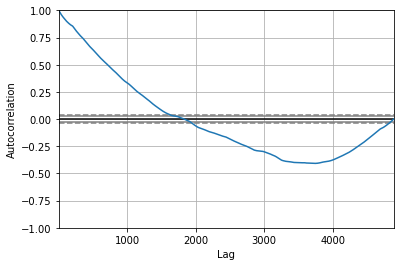

In [3]:
# autocorrelation plot 

autocorrelation_plot(df['Close'])
plt.show()

First quarter of the data is significantly correlated positively. 

In [5]:
! pip install statsmodels

Test RMSE: 353.535


Text(0.5, 1.0, 'Original vs Predicted Stock Price')

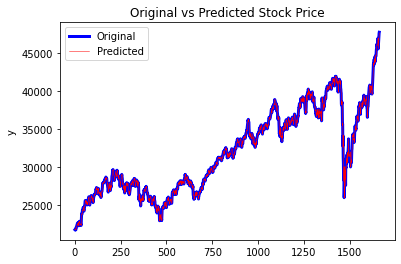

In [42]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = df['Close'].values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
plt.plot(test, color = 'blue', linewidth = 3, label = 'Original' )
plt.plot(predictions, color='red',linewidth = 0.5, label = 'Predicted')
plt.legend()
plt.ylabel('y') 
plt.xticks(x = df.index)
plt.title('Original vs Predicted Stock Price')



## Model 2 : LSTM

In [54]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
import os

In [55]:
# splitting into train (75%) and test frames

train_df,test_df = df[1:3668], df[3668:] 

In [ ]:
# Scaling the values 

train = train_df
scalers={}
for i in train_df.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    s_s = scaler.fit_transform(train[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+ i] = scaler
    train[i]=s_s
test = test_df
for i in train_df.columns:
    scaler = scalers['scaler_'+i]
    s_s = scaler.transform(test[i].values.reshape(-1,1))
    s_s=np.reshape(s_s,len(s_s))
    scalers['scaler_'+i] = scaler
    test[i]=s_s


In [57]:
# Converting the series to samples 

def split_series(series, n_past, n_future):
  #
  # n_past ==> no of past observations
  #
  # n_future ==> no of future observations 
  #
  X, y = list(), list()
  for window_start in range(len(series)):
    past_end = window_start + n_past
    future_end = past_end + n_future
    if future_end > len(series):
      break
    # slicing the past and future parts of the window
    past, future = series[window_start:past_end, :], series[past_end:future_end, :]
    X.append(past)
    y.append(future)
  return np.array(X), np.array(y)

In [81]:
n_past = 20
n_future = 10 
n_features = 9

In [82]:
X_train, y_train = split_series(train.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split_series(test.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))

### Sequence to Sequence Model with one encoder layer and one decoder layer.

In [83]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)

encoder_states1 = encoder_outputs1[1:]

#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs1[0])

#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_outputs1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l1)

#
model_e1d1 = tf.keras.models.Model(encoder_inputs,decoder_outputs1)

#
model_e1d1.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 20, 9)]      0                                            
__________________________________________________________________________________________________
lstm_12 (LSTM)                  [(None, 100), (None, 44000       input_5[0][0]                    
__________________________________________________________________________________________________
repeat_vector_4 (RepeatVector)  (None, 10, 100)      0           lstm_12[0][0]                    
__________________________________________________________________________________________________
lstm_13 (LSTM)                  (None, 10, 100)      80400       repeat_vector_4[0][0]            
                                                                 lstm_12[0][1]              

### Sequence to Sequence Model with two encoder layers and two decoder layers.

In [84]:
encoder_inputs = tf.keras.layers.Input(shape=(n_past, n_features))
encoder_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
encoder_outputs1 = encoder_l1(encoder_inputs)
encoder_states1 = encoder_outputs1[1:]
encoder_l2 = tf.keras.layers.LSTM(100, return_state=True)
encoder_outputs2 = encoder_l2(encoder_outputs1[0])
encoder_states2 = encoder_outputs2[1:]
#
decoder_inputs = tf.keras.layers.RepeatVector(n_future)(encoder_outputs2[0])
#
decoder_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_inputs,initial_state = encoder_states1)
decoder_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(decoder_l1,initial_state = encoder_states2)
decoder_outputs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(decoder_l2)
#
model_e2d2 = tf.keras.models.Model(encoder_inputs,decoder_outputs2)
#
model_e2d2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 20, 9)]      0                                            
__________________________________________________________________________________________________
lstm_14 (LSTM)                  [(None, 20, 100), (N 44000       input_6[0][0]                    
__________________________________________________________________________________________________
lstm_15 (LSTM)                  [(None, 100), (None, 80400       lstm_14[0][0]                    
__________________________________________________________________________________________________
repeat_vector_5 (RepeatVector)  (None, 10, 100)      0           lstm_15[0][0]                    
____________________________________________________________________________________________

### Training the models 

In [85]:
reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e1d1.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e1d1=model_e1d1.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=25,validation_data=(X_test,y_test),batch_size=32,verbose=0,callbacks=[reduce_lr])

In [90]:
# Predictions 

pred_e1d1=model_e1d1.predict(X_test)
pred_e2d2=model_e2d2.predict(X_test)

# Inversing predictions 
for index,i in enumerate(train_df.columns):
    scaler = scalers['scaler_'+i]
    
    pred_e1d1[:,:,index]=scaler.inverse_transform(pred_e1d1[:,:,index])
    
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])

# Evaluation

from sklearn.metrics import mean_absolute_error
for index,i in enumerate(train_df.columns):
  print(i)
  for j in range(1,6):
    print("Day ",j,":")
    print("MAE-E1D1 : ",mean_absolute_error(y_test[:,j-1,index],pred_e1d1[:,j-1,index]),end=", ")
    print("MAE-E2D2 : ",mean_absolute_error(y_test[:,j-1,index],pred_e2d2[:,j-1,index]))
  print()
  print()

Open
Day  1 :
MAE-E1D1 :  2750.87907651404, MAE-E2D2 :  2399.8248605144595
Day  2 :
MAE-E1D1 :  2510.0323927336544, MAE-E2D2 :  2489.399609702431
Day  3 :
MAE-E1D1 :  2453.757964755344, MAE-E2D2 :  2635.5229201592624
Day  4 :
MAE-E1D1 :  2534.917665876467, MAE-E2D2 :  2794.720991264145
Day  5 :
MAE-E1D1 :  2661.6621617639353, MAE-E2D2 :  2943.0490720609805


High
Day  1 :
MAE-E1D1 :  3153.196415123376, MAE-E2D2 :  2495.710933407114
Day  2 :
MAE-E1D1 :  3029.78307542697, MAE-E2D2 :  2410.437480354149
Day  3 :
MAE-E1D1 :  2954.200981965109, MAE-E2D2 :  2529.3306388503247
Day  4 :
MAE-E1D1 :  2933.062352656119, MAE-E2D2 :  2745.229504466157
Day  5 :
MAE-E1D1 :  2935.431717571249, MAE-E2D2 :  2979.7898614312658


Low
Day  1 :
MAE-E1D1 :  2189.3721431658632, MAE-E2D2 :  2667.254701906957
Day  2 :
MAE-E1D1 :  2491.247023653604, MAE-E2D2 :  2484.1238032402557
Day  3 :
MAE-E1D1 :  2753.481177637783, MAE-E2D2 :  2599.750124423722
Day  4 :
MAE-E1D1 :  2999.459139904652, MAE-E2D2 :  2823.87086127

From above observation, model E2D2 performed better in many cases. 

## Model 3 : Random Forest Regressor

In [111]:
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(df))
new_df.columns = df.columns
new_df.index = df.index 
new_df.head()



,Open,High,Low,Close,Volume,Day_Perc_Change,Close_stationary,Polarity,Subjectivity
Date,,,,,,,,,
2001-01-03,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.505640,0.530945
2001-01-04,0.000029,0.000027,0.000028,0.000028,0.0,0.470852,0.049252,0.299097,0.289130
2001-01-05,0.000028,0.000027,0.000028,0.000029,0.0,0.480511,0.049413,0.654276,0.462708
2001-01-08,0.000028,0.000027,0.000028,0.000028,0.0,0.377553,0.047788,0.251857,0.216128
2001-01-09,0.000027,0.000027,0.000028,0.000028,0.0,0.430472,0.048629,0.249848,0.339717


In [112]:

X = new_df.drop('Close_stationary', axis =1 )

X.drop('Close', axis= 1, inplace= True )
y = new_df['Close']

X.head()

,Open,High,Low,Volume,Day_Perc_Change,Polarity,Subjectivity
Date,,,,,,,
2001-01-03,1.000000,1.000000,1.000000,0.0,1.000000,0.505640,0.530945
2001-01-04,0.000029,0.000027,0.000028,0.0,0.470852,0.299097,0.289130
2001-01-05,0.000028,0.000027,0.000028,0.0,0.480511,0.654276,0.462708
2001-01-08,0.000028,0.000027,0.000028,0.0,0.377553,0.251857,0.216128
2001-01-09,0.000027,0.000027,0.000028,0.0,0.430472,0.249848,0.339717


In [113]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 0)
x_train.shape

(3912, 7)

In [114]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
prediction = rf.predict(x_test)
print(mean_squared_error(prediction, y_test))

9.79564930042165e-07


## Model 4 : AdaBoost Regressor 


In [115]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predictions = adb.predict(x_test)
print(mean_squared_error(predictions, y_test))

4.27688092952835e-08


## Model 5 : Decision Tree Regressor 


In [116]:
from sklearn.tree import DecisionTreeRegressor
dec_tree = DecisionTreeRegressor()
dec_tree.fit(x_train, y_train)
predictions = dec_tree.predict(x_test)
print(mean_squared_error(predictions, y_test))

4.2691238960583754e-08


## Model 6: Light GBM Regressor 

In [117]:
import lightgbm
lgb = lightgbm.LGBMRegressor()
lgb.fit(x_train, y_train)
predictions = lgb.predict(x_test)
print(mean_squared_error(predictions, y_test))

2.6790581856537503e-06


## Model 7: XGBoost

In [118]:
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(x_train,y_train)
predictions = xgb.predict(x_test)
print(mean_squared_error(predictions , y_test))

[09:42:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
7.670525673295583e-10


## Model 8 : Auto SKLearn

In [7]:
!python3 -m pip install --upgrade pip
!pip3 install scikit-learn==0.24.1
!pip3 install pandas

     |████████████████████████████████| 1.6MB 7.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [8]:
!curl https://raw.githubusercontent.com/automl/auto-sklearn/master/requirements.txt | xargs -n 1 -L 1 pip3 install
!pip3 install auto-sklearn

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   209  100   209    0     0   1142      0 --:--:-- --:--:-- --:--:--  1142
     |████████████████████████████████| 965 kB 7.6 MB/s 
     |████████████████████████████████| 114 kB 27.2 MB/s 
  Attempting uninstall: dask
    Found existing installation: dask 2.12.0
    Uninstalling dask-2.12.0:
      Successfully uninstalled dask-2.12.0


In [9]:
!pip3 install auto-sklearn --upgrade

In [10]:
import autosklearn

print(autosklearn.__version__)

0.12.6


In [13]:
python3 -m venv tutorial-env

SyntaxError: ignored

In [12]:
! pip install "dask[complete]"

In [11]:
from autosklearn.regression import AutoSklearnRegressor
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=120,
    per_run_time_limit=30,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
    output_folder='/tmp/autosklearn_regression_example_out',
)
automl.fit(x_train, y_train, dataset_name='stock_price')

ImportError: ignored